# Machine Learning Pipeline - Feature Selection

In this notebook, we pick up the transformed datasets that we saved in the previous notebook.

## Reproducibility: Setting the seed

With the aim to ensure reproducibility between runs of the same notebook, but also between the research and production environment, for each step that includes some element of randomness, it is extremely important that we **set the seed**.

In [16]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt

# to build the models
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [17]:
# load the train and test set with the engineered variables

# we built and saved these datasets in the previous lecture.
# If you haven't done so, go ahead and check the previous notebook
# to find out how to create these datasets

X_train = pd.read_csv('xtrain.csv')
X_test = pd.read_csv('xtest.csv')

X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
0,0.750000,0.75,0.461171,0.366365,1.0,1.0,0.333333,1.000000,1.0,0.0,0.0,0.863636,0.4,1.0,0.75,0.6,0.777778,0.50,0.014706,0.049180,0.0,0.0,1.0,1.0,0.333333,0.00000,0.666667,0.5,1.0,0.666667,0.666667,0.666667,1.0,0.002835,0.0,0.0,0.673479,0.239935,1.0,1.00,1.0,1.0,0.559760,0.0,0.0,0.523250,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.000000,0.0,0.75,0.018692,1.0,0.75,0.430183,0.5,0.5,1.0,0.116686,0.032907,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.545455,0.666667,0.75,0.0,0.0,0.0
1,0.750000,0.75,0.456066,0.388528,1.0,1.0,0.333333,0.333333,1.0,0.0,0.0,0.363636,0.4,1.0,0.75,0.6,0.444444,0.75,0.360294,0.049180,0.0,0.0,0.6,0.6,0.666667,0.03375,0.666667,0.5,0.5,0.333333,0.666667,0.000000,0.8,0.142807,0.0,0.0,0.114724,0.172340,1.0,1.00,1.0,1.0,0.434539,0.0,0.0,0.406196,0.333333,0.0,0.333333,0.5,0.375,0.333333,0.666667,0.250000,1.0,0.000000,0.0,0.75,0.457944,0.5,0.25,0.220028,0.5,0.5,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.75,1.0,0.0,0.636364,0.666667,0.75,0.0,0.0,0.0
2,0.916667,0.75,0.394699,0.336782,1.0,1.0,0.000000,0.333333,1.0,0.0,0.0,0.954545,0.4,1.0,1.00,0.6,0.888889,0.50,0.036765,0.098361,1.0,0.0,0.3,0.2,0.666667,0.25750,1.000000,0.5,1.0,1.000000,0.666667,0.000000,1.0,0.080794,0.0,0.0,0.601951,0.286743,1.0,1.00,1.0,1.0,0.627205,0.0,0.0,0.586296,0.333333,0.0,0.666667,0.0,0.250,0.333333,1.000000,0.333333,1.0,0.333333,0.8,0.75,0.046729,0.5,0.50,0.406206,0.5,0.5,1.0,0.228705,0.149909,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.090909,0.666667,0.75,0.0,0.0,0.0
3,0.750000,0.75,0.445002,0.482280,1.0,1.0,0.666667,0.666667,1.0,0.0,0.0,0.454545,0.4,1.0,0.75,0.6,0.666667,0.50,0.066176,0.163934,0.0,0.0,1.0,1.0,0.333333,0.00000,0.666667,0.5,1.0,0.666667,0.666667,1.000000,1.0,0.255670,0.0,0.0,0.018114,0.242553,1.0,1.00,1.0,1.0,0.566920,0.0,0.0,0.529943,0.333333,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.250000,1.0,0.333333,0.4,0.75,0.084112,0.5,0.50,0.362482,0.5,0.5,1.0,0.469078,0.045704,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.636364,0.666667,0.75,1.0,0.0,0.0
4,0.750000,0.75,0.577658,0.391756,1.0,1.0,0.333333,0.333333,1.0,0.0,0.0,0.363636,0.4,1.0,0.75,0.6,0.555556,0.50,0.323529,0.737705,0.0,0.0,0.6,0.7,0.666667,0.17000,0.333333,0.5,0.5,0.333333,0.666667,0.000000,0.6,0.086818,0.0,0.0,0.434278,0.233224,1.0,0.75,1.0,1.0,0.549026,0.0,0.0,0.513216,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.333333,0.416667,1.0,0.333333,0.8,0.75,0.411215,0.5,0.50,0.406206,0.5,0.5,1.0,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.00,1.0,0.0,0.545455,0.666667,0.75,0.0,0.0,0.0


In [7]:
# load the target (remember that the target is log transformed)
y_train = pd.read_csv('ytrain.csv')
y_test = pd.read_csv('ytest.csv')

y_train.head()

,SalePrice
0,12.211060
1,11.887931
2,12.675764
3,12.278393
4,12.103486


In [18]:
X_train.shape, X_test.shape

((1314, 81), (146, 81))

### Feature Selection

Let's go ahead and select a subset of the most predictive features. There is an element of randomness in the Lasso regression, so remember to set the seed.

In [19]:
# We will do the model fitting and feature selection
# altogether in a few lines of code

# first, we specify the Lasso Regression model, and we
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

# Then we use the selectFromModel object from sklearn, which
# will select automatically the features which coefficients are non-zero

# remember to set the seed, the random state in this function
sel_ = SelectFromModel(Lasso(alpha=0.001, random_state=0))

# train Lasso model and select features
sel_.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.001, random_state=0))

In [20]:
sel_.get_support().sum()

36

In [21]:
# let's visualise those features that were selected.
# (selected features marked with True)

sel_.get_support()

array([ True,  True, False,  True, False, False,  True,  True, False,
        True, False,  True, False, False, False, False,  True,  True,
       False,  True,  True, False,  True, False, False, False,  True,
       False,  True,  True, False,  True,  True, False, False, False,
       False, False, False,  True,  True, False,  True,  True, False,
        True,  True, False,  True,  True, False, False,  True,  True,
        True,  True,  True, False, False,  True,  True, False, False,
       False,  True,  True, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False])

In [22]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feats = X_train.columns[(sel_.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feats)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 81
selected features: 36
features with coefficients shrank to zero: 45


In [23]:
# print the selected features
selected_feats

Index(['MSSubClass', 'MSZoning', 'LotArea', 'LotShape', 'LandContour',
       'LotConfig', 'Neighborhood', 'OverallQual', 'OverallCond',
       'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'CentralAir',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageFinish', 'GarageCars', 'PavedDrive', 'WoodDeckSF',
       'ScreenPorch', 'SaleCondition'],
      dtype='object')

In [24]:
pd.Series(selected_feats).to_csv('selected_features.csv', index=False)

# Additional Resources

- [Feature Selection for Machine Learning](https://www.trainindata.com/p/feature-selection-for-machine-learning) - Online Course
- [Feature Selection in Machine Learning with Python](https://leanpub.com/feature-selection-in-machine-learning/) - Book
- [Feature Selection for Machine Learning: A comprehensive Overview](https://www.blog.trainindata.com/feature-selection-for-machine-learning/) - Article

Selected features: Index(['LotArea', 'Neighborhood', 'OverallQual', 'BsmtFinSF1', 'CentralAir',
       '1stFlrSF', 'GrLivArea', 'GarageCars'],
      dtype='object')


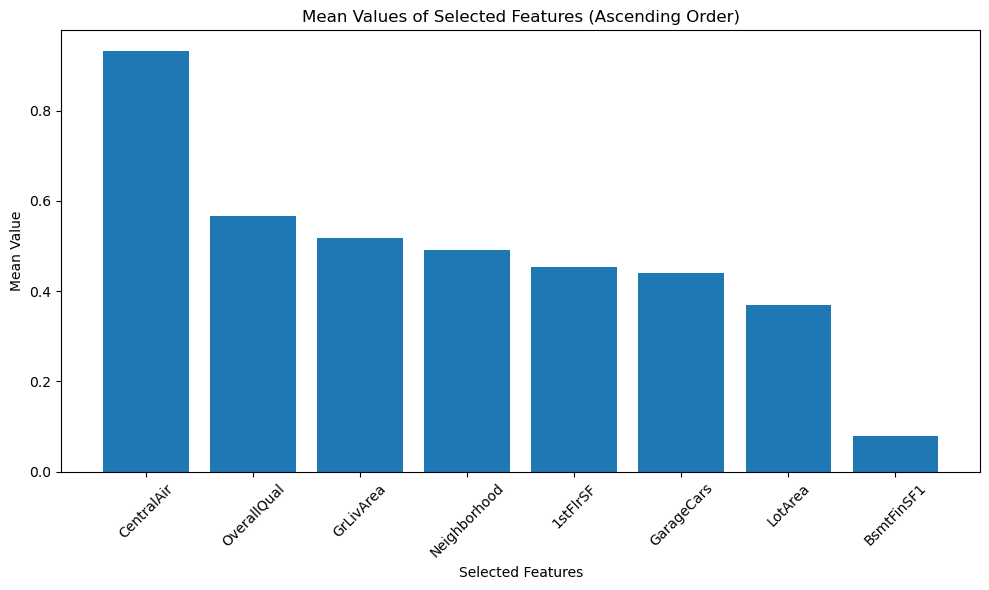

Training set shape: (1314, 8)
Testing set shape: (146, 8)
Model Coefficients: [[0.35693802 0.3588629  0.82464949 0.52697538 0.17282022 0.22267203
  0.91554966 0.2404719 ]]
Model Intercept: [10.36493516]
Mean Squared Error: 929171607.4340867
R2 Score: 0.8647910332297323


In [47]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# load the train and test set with the engineered variables

X_train = pd.read_csv('xtrain.csv')
X_test = pd.read_csv('xtest.csv')

# X_train.head()

# load the target (remember that the target is log transformed)
y_train = pd.read_csv('ytrain.csv')
y_test = pd.read_csv('ytest.csv')

# y_train.head()

# DecisionTreeClassifier for feature selection.

# Specify the Decision Tree Regressor model
tree_model = DecisionTreeRegressor(random_state=0)

# Use the SelectFromModel object for feature selection
sel_ = SelectFromModel(tree_model, threshold="mean")

# Train the Decision Tree Regressor and select features
sel_.fit(X_train, y_train)

# Get selected features
selected_features = X_train.columns[(sel_.get_support())]

print(f"Selected features: {selected_features}")

# Calculate the mean value of each selected feature and sort them in ascending order
mean_importances = X_train[selected_features].mean().sort_values(ascending=False)

# Plot the bar plot for the mean values of the selected features
plt.figure(figsize=(10, 6))
plt.bar(mean_importances.index, mean_importances.values, align='center')
plt.xticks(rotation=45)
plt.xlabel('Selected Features')
plt.ylabel('Mean Value')
plt.title('Mean Values of Selected Features (Ascending Order)')
plt.tight_layout()
plt.show()


# Define the feature columns and target variable
selected_features = ['LotArea', 'Neighborhood', 'OverallQual', 'BsmtFinSF1', 
                     'CentralAir', '1stFlrSF', 'GrLivArea', 'GarageCars']
target_variable = 'SalePrice'

X_train = X_train[selected_features]
X_test = X_test[selected_features]


# Display shapes of the training and testing sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# Step 5: Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate the model
mse = mean_squared_error(np.exp(y_test), np.exp(y_pred))
r2 = r2_score(np.exp(y_test), np.exp(y_pred))

# Display results
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)



In [32]:
X_train[selected_features]

,LotArea,Neighborhood,OverallQual,BsmtFinSF1,CentralAir,1stFlrSF,GrLivArea,GarageCars
0,0.366365,0.863636,0.777778,0.002835,1.0,0.559760,0.523250,0.75
1,0.388528,0.363636,0.444444,0.142807,1.0,0.434539,0.406196,0.25
2,0.336782,0.954545,0.888889,0.080794,1.0,0.627205,0.586296,0.50
3,0.482280,0.454545,0.666667,0.255670,1.0,0.566920,0.529943,0.50
4,0.391756,0.363636,0.555556,0.086818,1.0,0.549026,0.513216,0.50
...,...,...,...,...,...,...,...,...
1309,0.377020,1.000000,0.777778,0.206060,1.0,0.504851,0.692428,0.75
1310,0.380481,0.272727,0.333333,0.078313,1.0,0.439537,0.410869,0.50
1311,0.366473,0.272727,0.555556,0.000000,1.0,0.519487,0.615356,0.50
1312,0.169480,0.636364,0.666667,0.000000,1.0,0.582551,0.544554,0.50


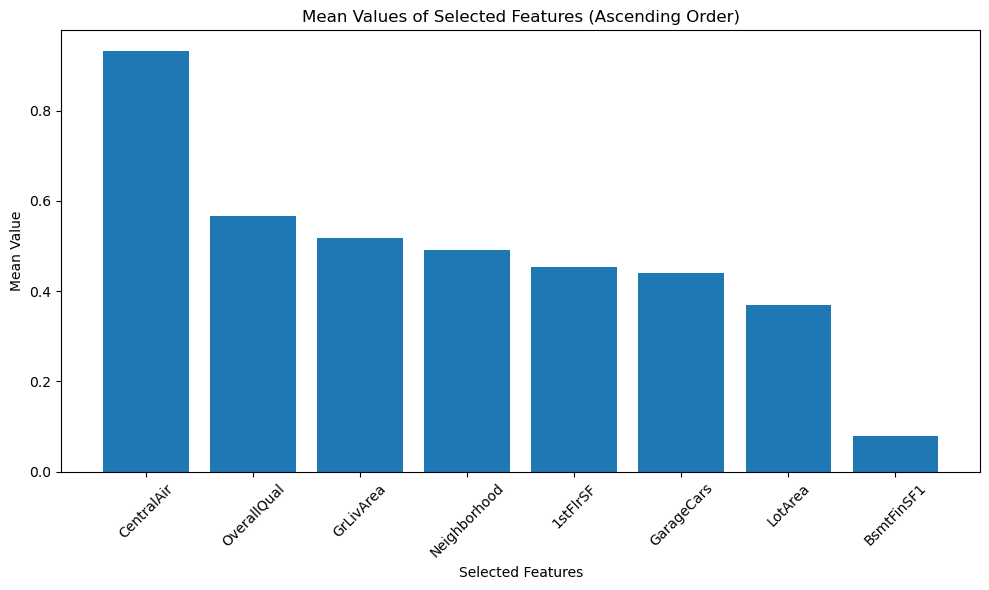

In [42]:
# Calculate the mean value of each selected feature and sort them in ascending order
mean_importances = X_train[selected_features].mean().sort_values(ascending=False)

# Plot the bar plot for the mean values of the selected features
plt.figure(figsize=(10, 6))
plt.bar(mean_importances.index, mean_importances.values, align='center')
plt.xticks(rotation=45)
plt.xlabel('Selected Features')
plt.ylabel('Mean Value')
plt.title('Mean Values of Selected Features (Ascending Order)')
plt.tight_layout()
plt.show()


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define the feature columns and target variable
selected_features = ['LotArea', 'Neighborhood', 'OverallQual', 'BsmtFinSF1', 
                     'CentralAir', '1stFlrSF', 'GrLivArea', 'GarageCars']
target_variable = 'SalePrice'

X_train = X_train[selected_features]
X_test = X_test[selected_features]


# Display shapes of the training and testing sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# Step 5: Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate the model
mse = mean_squared_error(np.exp(y_test), np.exp(y_pred))
r2 = r2_score(np.exp(y_test), np.exp(y_pred))

# Display results
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)


Training set shape: (1314, 8)
Testing set shape: (146, 8)
Model Coefficients: [[0.35693802 0.3588629  0.82464949 0.52697538 0.17282022 0.22267203
  0.91554966 0.2404719 ]]
Model Intercept: [10.36493516]
Mean Squared Error: 929171607.4340867
R2 Score: 0.8647910332297323
